[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1T9QtClYDyJQTikjoGJlIbKVrjInoBdcE?usp=sharing)

# Estimating grain yield using TPF 

Here we use the temperature **Trapezoid temperature function** with different cardinal temperature combinations with and without VPD stress function for the period from heading to maturity (grain filling period). 

Authors: 
-    **Azam Lashkari** (CIMMYT-China, azam.lashkari@jic.ac.uk)
-    **Urs Christoph Schulthess** (CIMMYT-China, U.Schulthess@cgiar.org)
-    **Ernesto Giron Echeverry** (Independent Researcher, e.giron.e@gmail.com)

Last updated: October 01, 2023


## Load libraries

In [1]:
import os, sys, gc
import pandas as pd
#import datetime as dt
pd.set_option('display.max_columns', None)

# Import Temperature Response Functions package
import tfunct
from tfunct.data import load_dataset # Function to load existing dataset
from tfunct.model import Model # Load module to create a model
from tfunct.model import tday, gpp  # Module to calculate GPP and estimated yield
from tfunct.util import figures # module to create figures

print(tfunct.__version__)

tfunct version 1.0.0


## Load Phenology, NDVI and Weather example datasets

In [2]:
%%time
# Load example dataset (Phenology, NDVI and Weather data for each site)
data = load_dataset()

CPU times: user 71 ms, sys: 48.3 ms, total: 119 ms
Wall time: 57.2 ms


Note: For details how to display phenology, ndvi and weather tables, please see [Getting Started](Getting_Started.ipynb)

## Create a model

The model contains all of the required functions to analyse the data

In [3]:
%%time 

# Define the Path where the output data will be stored
PATH_PRJ = '/Users/ernestogiron/Desktop/TemperatureFunctions/'
RESULTS_PATH = PATH_PRJ + 'results/'

config = {
    "PROJECT_PATH": PATH_PRJ,
    "RESULTS_PATH": RESULTS_PATH, #'./', # Results will be put in the same folder where the model is running
}

# create model to estimate grain yield
model = Model(config)
model.preprocess_raw_datasets(data) # Preprocess datasets
# Prepare dataset to run all process in parallel using NDVIA GPU if available
sites = model.prepareData()

50it [00:01, 38.20it/s]

CPU times: user 1.62 s, sys: 78.4 ms, total: 1.69 s
Wall time: 1.69 s


## Trapezoid temperature function (TPF)


### No stress conditions

In [4]:
%%time
TPF_noStress = model.getYield(tfun='TPF', sites=sites, is_VPDStress=False, expCSV=True)
TPF_noStress.head()

CPU times: user 704 ms, sys: 31.4 ms, total: 736 ms
Wall time: 742 ms


,UID,country,location,loc_code,cycle,ObsYield,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,SimYield
0,1,Nepal,Bhairahawa,BHR,2019,2.97,3.0,9.0,15.0,25.0,34.0,0.25,2.73
1,2,Pakistan,Faisalabad,FAS,2014,4.88,3.0,9.0,15.0,25.0,34.0,0.25,4.74
2,3,Pakistan,Faisalabad,FAS,2015,3.59,3.0,9.0,15.0,25.0,34.0,0.25,3.27
3,4,Pakistan,Faisalabad,FAS,2016,2.86,3.0,9.0,15.0,25.0,34.0,0.25,3.94
4,5,Pakistan,Faisalabad,FAS,2017,3.93,3.0,9.0,15.0,25.0,34.0,0.25,4.34


### Stressed VPD 

In [5]:
%%time
TPF_SFvpd = model.getYield(tfun='TPF', sites=sites, is_VPDStress=True, expCSV=True)
TPF_SFvpd.head()

CPU times: user 129 ms, sys: 3.43 ms, total: 132 ms
Wall time: 133 ms


,UID,country,location,loc_code,cycle,ObsYield,RUE,TminFactor,Tmin,Toptmin,Toptmax,Tmax,Lvpd,Uvpd,SFvpd_Lthres,SFvpd_Uthres,SimYield
0,1,Nepal,Bhairahawa,BHR,2019,2.97,3.0,9.0,15.0,25.0,34.0,0.25,1.0,4.0,0.2,1.0,1.77
1,2,Pakistan,Faisalabad,FAS,2014,4.88,3.0,9.0,15.0,25.0,34.0,0.25,1.0,4.0,0.2,1.0,3.48
2,3,Pakistan,Faisalabad,FAS,2015,3.59,3.0,9.0,15.0,25.0,34.0,0.25,1.0,4.0,0.2,1.0,2.73
3,4,Pakistan,Faisalabad,FAS,2016,2.86,3.0,9.0,15.0,25.0,34.0,0.25,1.0,4.0,0.2,1.0,2.50
4,5,Pakistan,Faisalabad,FAS,2017,3.93,3.0,9.0,15.0,25.0,34.0,0.25,1.0,4.0,0.2,1.0,2.52


### Display Grain Yield

Create a figure to compare simulated grain yield against observed. 

CPU times: user 1.09 s, sys: 116 ms, total: 1.2 s
Wall time: 695 ms


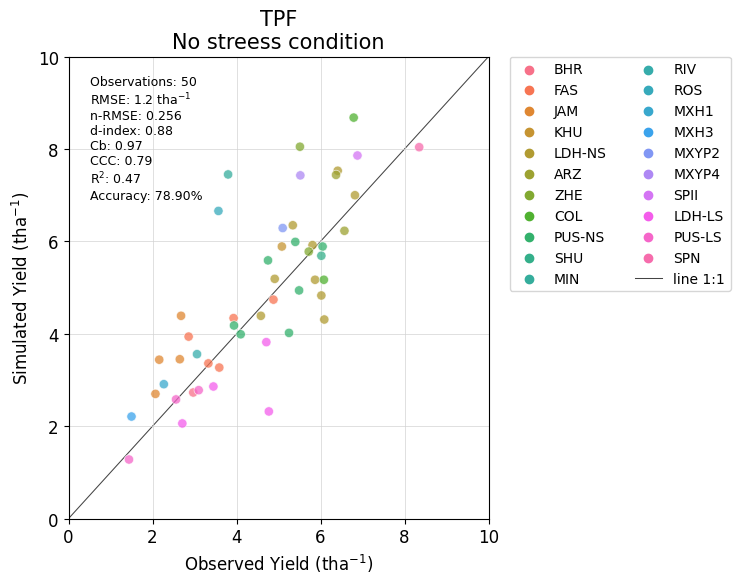

In [6]:
%%time
dirname=os.path.join(config['RESULTS_PATH'], 'TPF', 'Figures')
figures.chart_compareResults(df_result=TPF_noStress, fld1="ObsYield", fld2="SimYield", alpha=.75, s=45, xy_lim=2, hue='loc_code', 
                             loc_leg=2, ncol=2, ha='left', va='top',
                             title='TPF\nNo streess condition', #xlabel='', ylabel='', 
                             dirname=dirname, fname='TPF_noStress', 
                             dispScore=True, dispLegend=True, saveFig=True, showFig=True, fmt='jpg')


CPU times: user 860 ms, sys: 79.5 ms, total: 939 ms
Wall time: 547 ms


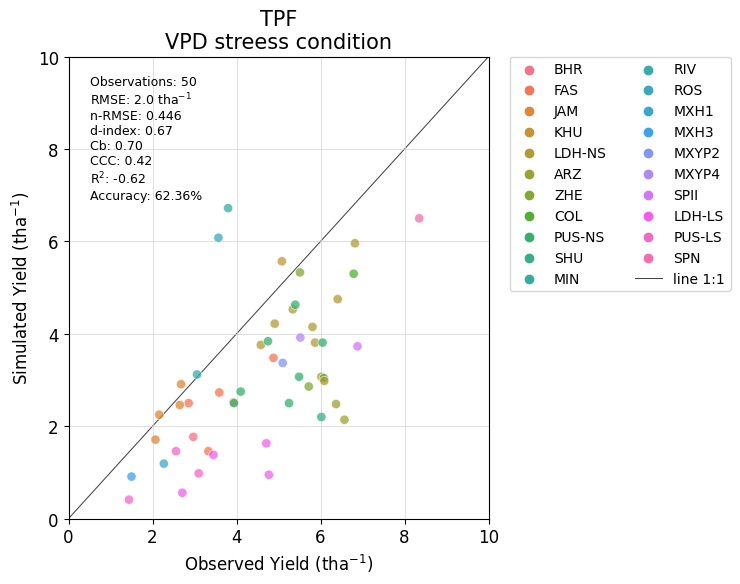

In [7]:
%%time
dirname=os.path.join(config['RESULTS_PATH'], 'TPF', 'Figures')
figures.chart_compareResults(df_result=TPF_SFvpd, fld1="ObsYield", fld2="SimYield", alpha=.75, s=45, xy_lim=2, hue='loc_code', 
                             loc_leg=2, ncol=2, ha='left', va='top',
                             title='TPF\nVPD streess condition', #xlabel='', ylabel='', 
                             dirname=dirname, fname='TPF_SFvpd', 
                             dispScore=True, dispLegend=True, saveFig=True, showFig=True, fmt='jpg')


CPU times: user 1.66 s, sys: 222 ms, total: 1.88 s
Wall time: 894 ms


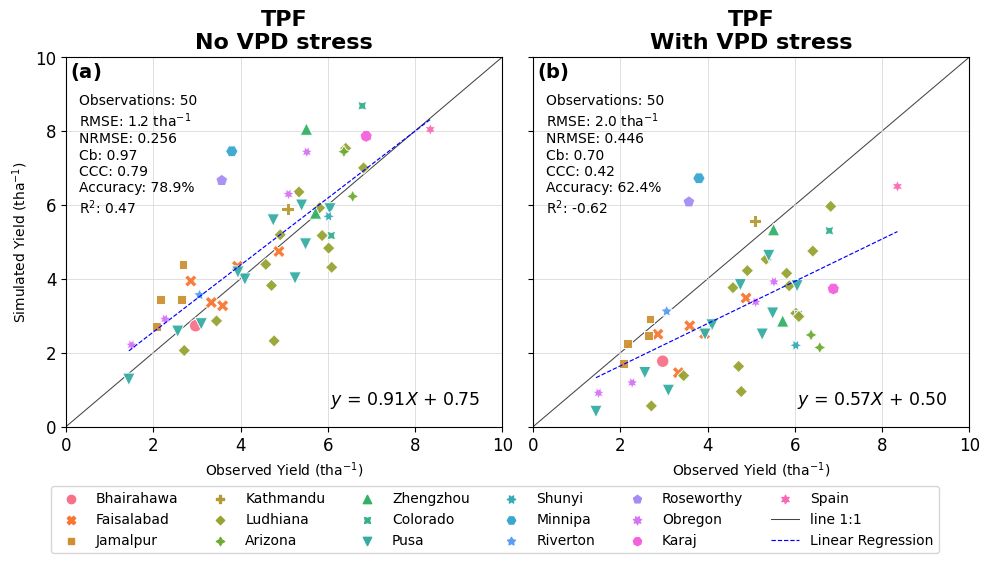

In [8]:
%%time
path_to_save_results=os.path.join(config['RESULTS_PATH'], 'TPF')
figures.plot_corrTempFunct(cmb_noStress=TPF_noStress, cmb_noStress_filtered=None, 
                           cmb_SFvpd=TPF_SFvpd, cmb_SFvpd_filtered=None,
                   functype='TPF',fld1='ObsYield',fld2='SimYield',hue='location', ncol=6, s=80, alpha=0.95, xy_lim=1, 
                   fonts_axes=10, fonts_titles=12, dispScore=True, errorbar=True, saveFig=True, showFig=True,
                   path_to_save_results=path_to_save_results, dirname='Figures', fname='Fig_1_errorbar', fmt='pdf')

## Combinations

To establish the optimum temperature response for grain-filling period, you can run several models using a wide range of cardinal temperatures. 

The optimum temperature for photosynthesis depends on the choosen temperature function.


### TPF combinations

#### No stress conditions

In [9]:
%%time

functype='TPF'
isVPDStress=False
df_GYield, data_input, cols = model.setup_dataInput_forCombinations(sites) # Setup input data
# 1) Combinations for TPF (no stress)
RUE = [3.0]
Tmin = [x for x in range(0, 5)]
Toptmin = [x for x in range(14, 20)]
Toptmax = [x for x in range(15, 20)]
Tmax = [x for x in range(30, 40)]
TminFactor = [0.25]
# No stress conditions
array_params_to_run, array_results = model.getCombinations(functype=functype, cols=cols, RUE=RUE, 
                                                           Tmin=Tmin, Toptmin=Toptmin, Toptmax=Toptmax, Tmax=Tmax, 
                                                           TminFactor=TminFactor, isVPDStress=isVPDStress)
cmb_TPF_noStress = model.getGYield_forCombinations(functype, df_GYield, data_input, array_params_to_run, 
                                                    isVPDStress, array_results, saveFile=True)
cmb_TPF_noStress


CPU times: user 1.86 s, sys: 33.6 ms, total: 1.89 s
Wall time: 1.9 s


,UID,country,location,loc_code,cycle,ObsYield,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,SimYield
0,1,Nepal,Bhairahawa,BHR,2019,2.97,3.0,0.0,14.0,15.0,30.0,0.25,1.29
1,2,Pakistan,Faisalabad,FAS,2014,4.88,3.0,0.0,14.0,15.0,30.0,0.25,2.65
2,3,Pakistan,Faisalabad,FAS,2015,3.59,3.0,0.0,14.0,15.0,30.0,0.25,2.15
3,4,Pakistan,Faisalabad,FAS,2016,2.86,3.0,0.0,14.0,15.0,30.0,0.25,1.54
4,5,Pakistan,Faisalabad,FAS,2017,3.93,3.0,0.0,14.0,15.0,30.0,0.25,2.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
37495,46,India,Pusa,PUS-LS,2018,1.44,3.0,4.0,18.0,19.0,39.0,0.25,1.17
37496,47,India,Pusa,PUS-LS,2019,3.10,3.0,4.0,18.0,19.0,39.0,0.25,2.50
37497,48,India,Ludhiana,LDH-NS,2022,6.09,3.0,4.0,18.0,19.0,39.0,0.25,3.84
37498,49,India,Ludhiana,LDH-LS,2022,4.77,3.0,4.0,18.0,19.0,39.0,0.25,2.09


#### No stress Metrics

In [10]:
%%time

m_TPF_noStress = model.getCombinations_Metrics(functype, isVPDStress, df_GYield, 
                                                 array_params_to_run, array_results, saveFile=True) #, fmt='parquet')
m_TPF_noStress

100%|████████████████████████████████████████████████████████████████████████████████████████████| 750/750 [00:30<00:00, 24.77it/s]

CPU times: user 28 s, sys: 2.56 s, total: 30.6 s
Wall time: 30.3 s


,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,MAE,MSE,RMSE,RMSRE,MAPE,pvalue,R2,EF,intercept,slope,Cb,CCC,Accuracy
0,3.0,0.0,14.0,15.0,30.0,0.25,2.386,6.935,2.633,57.047,53.493,5.649380e-09,0.510,-1.696,-0.2431,0.5328,0.39,0.29,46.51
1,3.0,0.0,14.0,15.0,31.0,0.25,2.198,5.954,2.440,52.386,49.026,7.032547e-10,0.551,-1.315,-0.1588,0.5562,0.43,0.33,50.97
2,3.0,0.0,14.0,15.0,32.0,0.25,2.025,5.118,2.262,48.047,44.864,8.950862e-11,0.587,-0.990,-0.0748,0.5764,0.47,0.37,55.14
3,3.0,0.0,14.0,15.0,33.0,0.25,1.868,4.419,2.102,44.164,41.087,1.341391e-11,0.618,-0.718,0.0015,0.5948,0.52,0.42,58.91
4,3.0,0.0,14.0,15.0,34.0,0.25,1.726,3.839,1.959,40.700,37.646,2.653647e-12,0.643,-0.492,0.0767,0.6102,0.56,0.46,62.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3.0,4.0,18.0,19.0,35.0,0.25,0.986,1.555,1.247,26.291,21.532,1.849601e-13,0.680,0.396,0.1290,0.7911,0.88,0.74,78.47
746,3.0,4.0,18.0,19.0,36.0,0.25,0.909,1.347,1.161,24.309,19.924,6.301395e-14,0.694,0.476,0.1983,0.7994,0.90,0.77,80.08
747,3.0,4.0,18.0,19.0,37.0,0.25,0.844,1.186,1.089,22.720,18.560,2.559257e-14,0.705,0.539,0.2643,0.8059,0.92,0.79,81.44
748,3.0,4.0,18.0,19.0,38.0,0.25,0.797,1.062,1.031,21.552,17.671,1.294678e-14,0.713,0.587,0.3239,0.8117,0.94,0.81,82.33


#### Stressed Vapor pressure deficit (VPD)

In [11]:
%%time

functype='TPF'
isVPDStress=True
df_GYield, data_input, cols = model.setup_dataInput_forCombinations(sites) # Setup input data
# Combinations
RUE = [3.0]
Tmin = [x for x in range(0, 5)]
Toptmin = [x for x in range(14, 20)]
Toptmax = [x for x in range(15, 20)]
Tmax = [x for x in range(30, 40)]
TminFactor = [0.25]
Lvpd = [1.5, 2, 2.5, 3]
Uvpd = [2, 2.5, 3, 3.5]
SFvpd_Lthres = [0.6, 0.8] 
SFvpd_Uthres = [1]
# No stress conditions
array_params_to_run, array_results = model.getCombinations(functype=functype, cols=cols, RUE=RUE, Tmin=Tmin, 
                                                           Toptmin=Toptmin, Toptmax=Toptmax,
                                                           Tmax=Tmax, TminFactor=TminFactor,  
                                                           Lvpd=Lvpd, Uvpd=Uvpd, SFvpd_Lthres=SFvpd_Lthres, SFvpd_Uthres=SFvpd_Uthres,
                                                           isVPDStress=isVPDStress)

# If combinations are not large
#cmb_TPF_SFvpd = model.getGYield_forCombinations(functype, df_GYield, data_input, array_params_to_run, 
#                                           isVPDStress, array_results, saveFile=True) # fmt='parquet' #csv
# cmb_TPF_SFvpd

# Use returnDF=False when the number of combinations is too large. 
# This avoid memory issues and save the file in parquet format by default
model.getGYield_forCombinations(functype, df_GYield, data_input, array_params_to_run, 
                                           isVPDStress, array_results, saveFile=True, returnDF=False)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:14<00:00,  1.08it/s]


  created_by: parquet-cpp-arrow version 13.0.0
  num_columns: 17
  num_rows: 749600
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 3350
  created_by: parquet-cpp-arrow version 13.0.0
  num_columns: 23
  num_rows: 14992
  num_row_groups: 1
  format_version: 2.6
  serialized_size: 4382
CPU times: user 31.4 s, sys: 12.4 s, total: 43.8 s
Wall time: 33.5 s


In [12]:
%%time

# The above command export metrics automatically, if not used the following command to get evaluations
m_TPF_SFvpd = model.getCombinations_Metrics(functype, isVPDStress, df_GYield, 
                                             array_params_to_run, array_results, saveFile=True)
m_TPF_SFvpd

100%|██████████████████████████████████████████████████████████████████████████████████████| 15000/15000 [00:10<00:00, 1427.37it/s]


CPU times: user 8.64 s, sys: 12 s, total: 20.7 s
Wall time: 10.6 s


,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,Lvpd,Uvpd,SFvpd_Lthres,SFvpd_Uthres,MAE,MSE,RMSE,RMSRE,MAPE,pvalue,R2,EF,intercept,slope,Cb,CCC,Accuracy
0,3.0,0.0,14.0,15.0,30.0,0.25,1.5,2.0,0.6,1.0,2.890,9.955,3.155,67.285,64.302,1.891892e-06,0.380,-2.870,-0.1922,0.4106,0.28,0.18,35.70
1,3.0,0.0,14.0,15.0,30.0,0.25,1.5,2.0,0.8,1.0,2.688,8.644,2.940,62.968,59.915,1.045183e-07,0.449,-2.360,-0.2051,0.4576,0.32,0.22,40.09
2,3.0,0.0,14.0,15.0,30.0,0.25,1.5,2.5,0.6,1.0,2.859,9.759,3.124,66.654,63.624,1.467053e-06,0.386,-2.794,-0.1917,0.4173,0.29,0.18,36.38
3,3.0,0.0,14.0,15.0,30.0,0.25,1.5,2.5,0.8,1.0,2.753,9.031,3.005,64.317,61.360,1.814225e-07,0.436,-2.511,-0.2123,0.4449,0.30,0.21,38.64
4,3.0,0.0,14.0,15.0,30.0,0.25,1.5,3.0,0.6,1.0,2.881,9.904,3.147,67.132,64.099,1.961385e-06,0.379,-2.850,-0.1945,0.4132,0.28,0.18,35.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,3.0,4.0,18.0,19.0,39.0,0.25,2.5,3.0,0.8,1.0,1.061,1.777,1.333,27.686,22.973,1.163686e-12,0.655,0.309,0.2340,0.7468,0.84,0.70,77.03
14996,3.0,4.0,18.0,19.0,39.0,0.25,2.5,3.5,0.6,1.0,1.321,2.652,1.629,34.206,28.945,3.840658e-10,0.562,-0.031,0.2013,0.6935,0.76,0.59,71.06
14997,3.0,4.0,18.0,19.0,39.0,0.25,2.5,3.5,0.8,1.0,1.208,2.227,1.492,31.131,26.252,2.021537e-11,0.612,0.134,0.2130,0.7160,0.79,0.64,73.75
14998,3.0,4.0,18.0,19.0,39.0,0.25,3.0,3.5,0.6,1.0,1.088,1.900,1.378,29.054,23.862,2.278331e-11,0.610,0.262,0.3101,0.7331,0.85,0.68,76.14


### Display grain yield comparison with and without VPD stress

In [13]:
%%time
# If the process above used "returnDF=False", it's necessary to load the data to create figures

# Defined path of the combinations and metrics files
c_TPF = os.path.join(config['RESULTS_PATH'], "TPF", "TPF_noStress", "combinations_Yield_TPF_noStress.parquet")
c_TPF_SFvpd = os.path.join(config['RESULTS_PATH'], "TPF", "TPF_SFvpd", "combinations_Yield_TPF_SFvpd.parquet")

cmb_TPF_noStress = pd.read_parquet(c_TPF)
cmb_TPF_SFvpd = pd.read_parquet(c_TPF_SFvpd)


CPU times: user 195 ms, sys: 95.1 ms, total: 290 ms
Wall time: 85.3 ms


CPU times: user 22.3 s, sys: 729 ms, total: 23 s
Wall time: 22.6 s


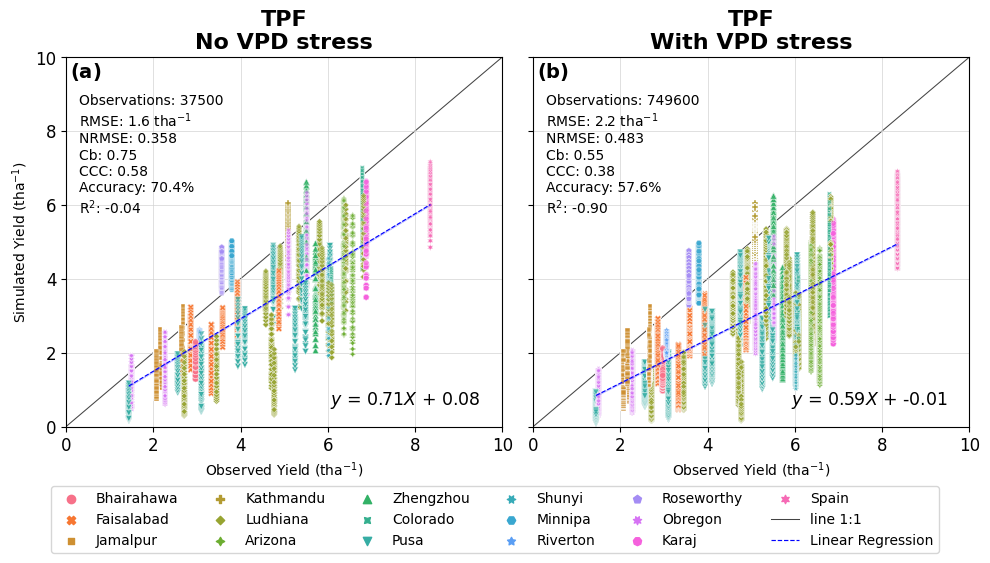

In [14]:
%%time
path_to_save_results=os.path.join(config['RESULTS_PATH'], 'TPF')
figures.plot_corrTempFunct(cmb_noStress=cmb_TPF_noStress, cmb_noStress_filtered=cmb_TPF_noStress, 
                   cmb_SFvpd=cmb_TPF_SFvpd, cmb_SFvpd_filtered=cmb_TPF_SFvpd,
                   functype='TPF',fld1='ObsYield',fld2='SimYield',hue='location', ncol=6, s=20, alpha=0.65, xy_lim=1, 
                   fonts_axes=10, fonts_titles=12, dispScore=True, errorbar=False, saveFig=True, showFig=True,
                   path_to_save_results=path_to_save_results, dirname='Figures', fname='Fig_2_nofilters', fmt='jpg')

CPU times: user 1.29 s, sys: 153 ms, total: 1.44 s
Wall time: 888 ms


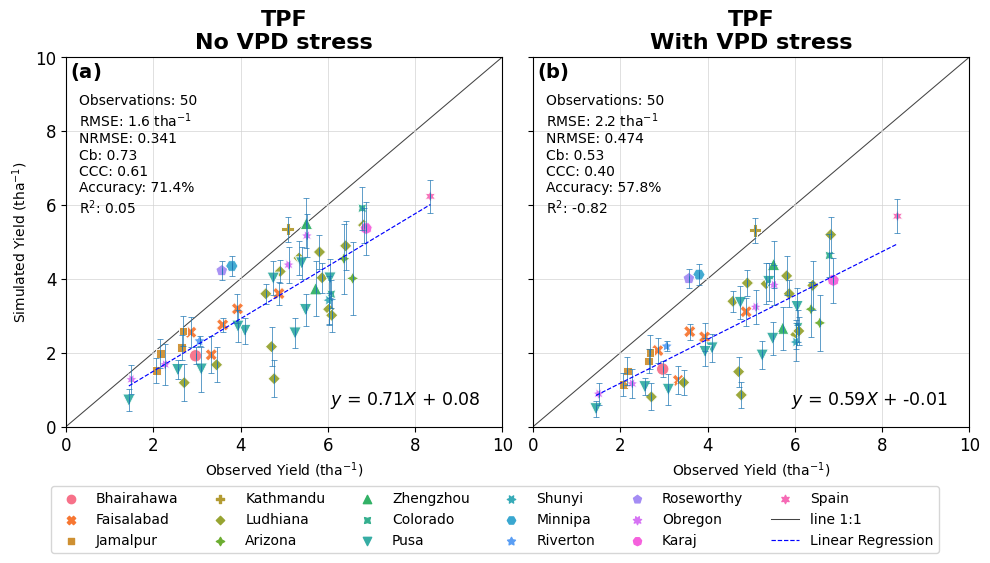

In [15]:
%%time
path_to_save_results=os.path.join(config['RESULTS_PATH'], 'TPF')
figures.plot_corrTempFunct(cmb_noStress=cmb_TPF_noStress, cmb_noStress_filtered=cmb_TPF_noStress, 
                   cmb_SFvpd=cmb_TPF_SFvpd, cmb_SFvpd_filtered=cmb_TPF_SFvpd,
                   functype='TPF',fld1='ObsYield',fld2='SimYield',hue='location', ncol=6, s=80, alpha=0.95, xy_lim=1, 
                   fonts_axes=10, fonts_titles=12, dispScore=True, errorbar=True, saveFig=True, showFig=True,
                   path_to_save_results=path_to_save_results, dirname='Figures', fname='Fig_2_nofilters_errorbar', fmt='jpg')

## Select the best results using filters

After running several models you can filter results to see which one look better. 

The following table is an example of one filter used to evaluate the best models, it only use three (3) evaluation metrics (_Cb, CCC, and RMSRE_) to select the top ones. 

| Temperature Function | Cb  | CCC  |  RMSRE |   |
|---------------------|---|---|---|---|
| **TPF** |  0.94 |  > 0.8 | < 20.9  |   |
| **TPF vpd stress** |  0.86 | > 0.7  | < 28  |   |


In [16]:
# Load module to filter combinations in an easy way
from tfunct.util import filterSimulations


#### filter TPF manually

In [17]:
m_TPF_noStress[
    (m_TPF_noStress['Cb']>0.94) & (m_TPF_noStress['CCC']>0.8) & (m_TPF_noStress['RMSRE']<20.9)
]

,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,MAE,MSE,RMSE,RMSRE,MAPE,pvalue,R2,EF,intercept,slope,Cb,CCC,Accuracy
589,3.0,3.0,17.0,19.0,39.0,0.25,0.769,0.989,0.995,20.786,17.151,4.626587e-15,0.725,0.615,0.3798,0.8058,0.95,0.82,82.85
599,3.0,3.0,18.0,19.0,39.0,0.25,0.760,0.971,0.985,20.632,16.959,3.673087e-15,0.728,0.622,0.3699,0.8108,0.95,0.83,83.04
749,3.0,4.0,18.0,19.0,39.0,0.25,0.759,0.968,0.984,20.738,17.005,7.516897e-15,0.720,0.624,0.3755,0.8174,0.96,0.83,83.00


In [18]:
m_TPF_SFvpd[(m_TPF_SFvpd['Cb']>0.86) & (m_TPF_SFvpd['CCC']>0.7) & (m_TPF_SFvpd['RMSRE']<28.0)]

,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,Lvpd,Uvpd,SFvpd_Lthres,SFvpd_Uthres,MAE,MSE,RMSE,RMSRE,MAPE,pvalue,R2,EF,intercept,slope,Cb,CCC,Accuracy
11999,3.0,3.0,18.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,0.986,1.566,1.251,26.065,21.338,3.842510e-13,0.670,0.391,0.3172,0.7489,0.87,0.73,78.66
14799,3.0,4.0,17.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,0.995,1.574,1.255,26.244,21.588,7.230819e-13,0.661,0.388,0.3345,0.7475,0.87,0.72,78.41
14999,3.0,4.0,18.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,0.976,1.545,1.243,26.043,21.209,8.038264e-13,0.660,0.400,0.3231,0.7555,0.88,0.73,78.79


### No stress conditions

Loading combinations...
Loading metrics...
750 combinations found
13 combinations found after applied filter
Filtered data set saved at /Users/ernestogiron/Desktop/TemperatureFunctions/results/TPF/TPF_filtered/filtered_metrics_combinations_Yield_TPF_noStress_20231001.parquet
CPU times: user 1.21 s, sys: 164 ms, total: 1.37 s
Wall time: 748 ms


,UID,country,location,loc_code,cycle,ObsYield,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,SimYield,MAE,MSE,RMSE,RMSRE,MAPE,pvalue,R2,EF,intercept,slope,Cb,CCC,Accuracy
0,1,Nepal,Bhairahawa,BHR,2019,2.97,3.0,0.0,14.0,19.0,39.0,0.25,2.29,0.772,1.001,1.000,20.832,17.193,3.050376e-15,0.73,0.611,0.3912,0.7970,0.94,0.82,82.81
1,2,Pakistan,Faisalabad,FAS,2014,4.88,3.0,0.0,14.0,19.0,39.0,0.25,4.08,0.772,1.001,1.000,20.832,17.193,3.050376e-15,0.73,0.611,0.3912,0.7970,0.94,0.82,82.81
2,3,Pakistan,Faisalabad,FAS,2015,3.59,3.0,0.0,14.0,19.0,39.0,0.25,3.01,0.772,1.001,1.000,20.832,17.193,3.050376e-15,0.73,0.611,0.3912,0.7970,0.94,0.82,82.81
3,4,Pakistan,Faisalabad,FAS,2016,2.86,3.0,0.0,14.0,19.0,39.0,0.25,3.23,0.772,1.001,1.000,20.832,17.193,3.050376e-15,0.73,0.611,0.3912,0.7970,0.94,0.82,82.81
4,5,Pakistan,Faisalabad,FAS,2017,3.93,3.0,0.0,14.0,19.0,39.0,0.25,3.84,0.772,1.001,1.000,20.832,17.193,3.050376e-15,0.73,0.611,0.3912,0.7970,0.94,0.82,82.81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,46,India,Pusa,PUS-LS,2018,1.44,3.0,4.0,18.0,19.0,39.0,0.25,1.17,0.759,0.968,0.984,20.738,17.005,7.516897e-15,0.72,0.624,0.3755,0.8174,0.96,0.83,83.00
646,47,India,Pusa,PUS-LS,2019,3.10,3.0,4.0,18.0,19.0,39.0,0.25,2.50,0.759,0.968,0.984,20.738,17.005,7.516897e-15,0.72,0.624,0.3755,0.8174,0.96,0.83,83.00
647,48,India,Ludhiana,LDH-NS,2022,6.09,3.0,4.0,18.0,19.0,39.0,0.25,3.84,0.759,0.968,0.984,20.738,17.005,7.516897e-15,0.72,0.624,0.3755,0.8174,0.96,0.83,83.00
648,49,India,Ludhiana,LDH-LS,2022,4.77,3.0,4.0,18.0,19.0,39.0,0.25,2.09,0.759,0.968,0.984,20.738,17.005,7.516897e-15,0.72,0.624,0.3755,0.8174,0.96,0.83,83.00


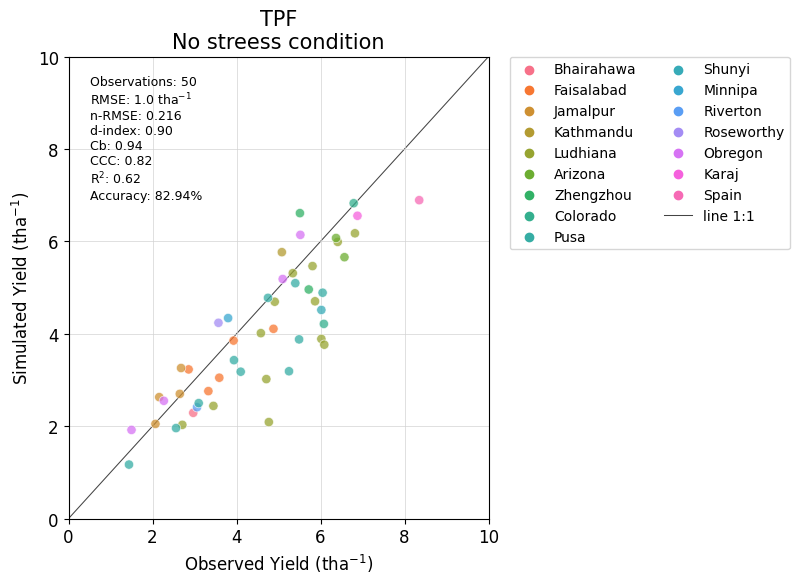

In [19]:
%%time
# path of the combinations and metrics files
c_TPF = os.path.join(config['RESULTS_PATH'], "TPF", "TPF_noStress", "combinations_Yield_TPF_noStress.parquet")
m_TPF = os.path.join(config['RESULTS_PATH'], "TPF", "TPF_noStress", "metrics_Yield_TPF_noStress.parquet")

# Filters
cmb_filters = dict(
                RUE = ('RUE', '=', 3.0 ),
                TminFactor = ('TminFactor', '=', 0.25 )
            )
met_filters = dict(
        Cb = ('>=', 0.94),
        CCC = ('>=', 0.8),
        Accuracy = ('>=', 82),
        RMSRE = ('<=', 20.9),
    )
outputPath = os.path.join(config['RESULTS_PATH'], "TPF")

# Use pdFormat=True to display filtered table. Use when the results are small to avoid freeze you computer session
# Use fmt='parquet' and avoid fmt='csv' when the results are quite large.
# Use dispFig=True if the filtered table is small.
filtered_c_TPF = filterSimulations(functype='TPF', VPDstress=False, cmb=c_TPF, met=m_TPF, 
                                 cmb_filters=cmb_filters, met_filters=met_filters, pdFormat=True, 
                                 dispFig=True, saveFig=True, figname='Fig_topComb_avgYield', figfmt='pdf',
                                 saveResults=True, outputPath=outputPath, fmt='parquet')

filtered_c_TPF

### VPD stress conditions

Loading combinations...
Loading metrics...
15000 combinations found
13 combinations found after applied filter
Filtered data set saved at /Users/ernestogiron/Desktop/TemperatureFunctions/results/TPF/TPF_filtered/filtered_metrics_combinations_Yield_TPF_SFvpd_20231001.parquet
CPU times: user 1.54 s, sys: 217 ms, total: 1.76 s
Wall time: 814 ms


,UID,country,location,loc_code,cycle,ObsYield,RUE,Tmin,Toptmin,Toptmax,Tmax,TminFactor,Lvpd,Uvpd,SFvpd_Lthres,SFvpd_Uthres,SimYield,MAE,MSE,RMSE,RMSRE,MAPE,pvalue,R2,EF,intercept,slope,Cb,CCC,Accuracy
0,1,Nepal,Bhairahawa,BHR,2019,2.97,3.0,4.0,16.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,2.12,1.019,1.613,1.270,26.564,22.086,1.068685e-12,0.656,0.373,0.3621,0.7380,0.86,0.72,77.91
1,2,Pakistan,Faisalabad,FAS,2014,4.88,3.0,4.0,16.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,4.04,1.019,1.613,1.270,26.564,22.086,1.068685e-12,0.656,0.373,0.3621,0.7380,0.86,0.72,77.91
2,3,Pakistan,Faisalabad,FAS,2015,3.59,3.0,4.0,16.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,3.04,1.019,1.613,1.270,26.564,22.086,1.068685e-12,0.656,0.373,0.3621,0.7380,0.86,0.72,77.91
3,4,Pakistan,Faisalabad,FAS,2016,2.86,3.0,4.0,16.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,2.83,1.019,1.613,1.270,26.564,22.086,1.068685e-12,0.656,0.373,0.3621,0.7380,0.86,0.72,77.91
4,5,Pakistan,Faisalabad,FAS,2017,3.93,3.0,4.0,16.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,3.55,1.019,1.613,1.270,26.564,22.086,1.068685e-12,0.656,0.373,0.3621,0.7380,0.86,0.72,77.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,46,India,Pusa,PUS-LS,2018,1.44,3.0,2.0,15.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,0.93,1.018,1.614,1.271,26.407,21.984,4.441160e-13,0.668,0.372,0.3486,0.7355,0.86,0.72,78.02
596,47,India,Pusa,PUS-LS,2019,3.10,3.0,2.0,15.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,1.74,1.018,1.614,1.271,26.407,21.984,4.441160e-13,0.668,0.372,0.3486,0.7355,0.86,0.72,78.02
597,48,India,Ludhiana,LDH-NS,2022,6.09,3.0,2.0,15.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,3.57,1.018,1.614,1.271,26.407,21.984,4.441160e-13,0.668,0.372,0.3486,0.7355,0.86,0.72,78.02
598,49,India,Ludhiana,LDH-LS,2022,4.77,3.0,2.0,15.0,19.0,39.0,0.25,3.0,3.5,0.8,1.0,1.75,1.018,1.614,1.271,26.407,21.984,4.441160e-13,0.668,0.372,0.3486,0.7355,0.86,0.72,78.02


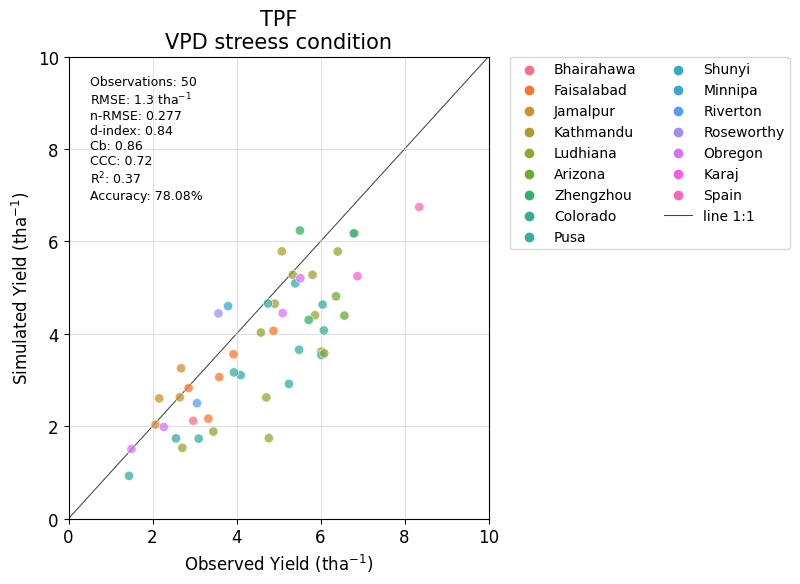

In [20]:
%%time

# Path of the combinations and metrics files
c_TPF_SFvpd = os.path.join(config['RESULTS_PATH'], "TPF", "TPF_SFvpd", "combinations_Yield_TPF_SFvpd.parquet")
m_TPF_SFvpd = os.path.join(config['RESULTS_PATH'], "TPF", "TPF_SFvpd", "metrics_Yield_TPF_SFvpd.parquet")

cmb_filters = dict(
                RUE = ('RUE', '=', 3.0 ),
                TminFactor = ('TminFactor', '=', 0.25 )
            )
met_filters = dict(
        Cb = ('>=', 0.86),
        CCC = ('>=', 0.7),
        #Accuracy = ('>=', 78),
        RMSRE = ('<=', 28),
    )
outputPath = os.path.join(config['RESULTS_PATH'], "TPF") 

# Use pdFormat=True to display filtered table. Use when the results are small to avoid freeze you computer session
# Use fmt='parquet' and avoid fmt='csv' when the results are quite large.
# Use dispFig=True if the filtered table is small.
filtered_c_TPF_SFvpd = filterSimulations(functype='TPF', VPDstress=True, cmb=c_TPF_SFvpd, met=m_TPF_SFvpd, 
                                 cmb_filters=cmb_filters, met_filters=met_filters, pdFormat=True, 
                                 dispFig=True, saveFig=True, figname='Fig_topComb_avgYield', figfmt='pdf',
                                 saveResults=True, outputPath=outputPath, fmt='parquet')

filtered_c_TPF_SFvpd

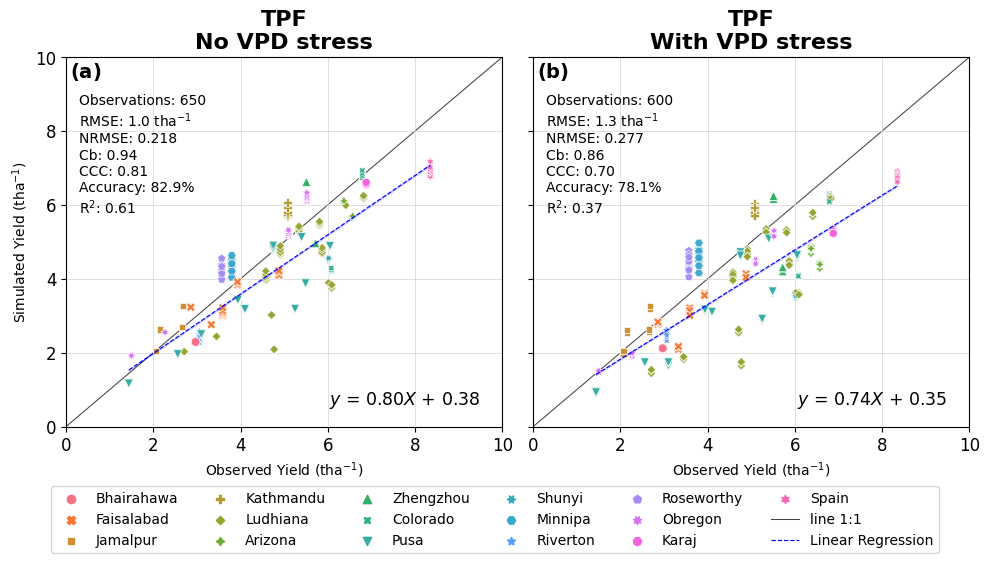

In [21]:
path_to_save_results=os.path.join(config['RESULTS_PATH'],'TPF', 'TPF_filtered')
figures.plot_corrTempFunct(cmb_noStress=filtered_c_TPF, cmb_noStress_filtered=filtered_c_TPF, 
                           cmb_SFvpd=filtered_c_TPF_SFvpd, cmb_SFvpd_filtered=filtered_c_TPF_SFvpd,
                   functype='TPF',fld1='ObsYield',fld2='SimYield',hue='location', ncol=6, s=40, alpha=0.95, xy_lim=1, 
                   fonts_axes=10, fonts_titles=12, dispScore=True, errorbar=False, saveFig=True, showFig=True,
                   path_to_save_results=path_to_save_results, dirname='Figures', fname='Fig_2_filtered', fmt='jpg')

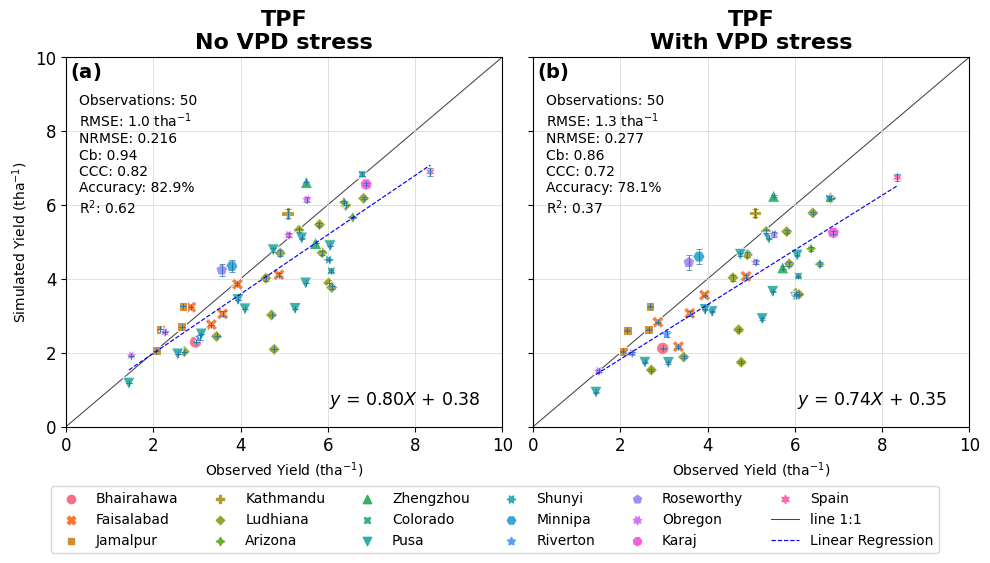

In [22]:
path_to_save_results=os.path.join(config['RESULTS_PATH'], 'TPF', 'TPF_filtered')
figures.plot_corrTempFunct(cmb_noStress=filtered_c_TPF, cmb_noStress_filtered=filtered_c_TPF, 
                           cmb_SFvpd=filtered_c_TPF_SFvpd, cmb_SFvpd_filtered=filtered_c_TPF_SFvpd,
                   functype='TPF',fld1='ObsYield',fld2='SimYield',hue='location', ncol=6, s=80, alpha=0.95, xy_lim=1, 
                   fonts_axes=10, fonts_titles=12, dispScore=True, errorbar=True, saveFig=True, showFig=True,
                   path_to_save_results=path_to_save_results, dirname='Figures', fname='Fig_2_filtered_errorbar', fmt='jpg')

# Comparison of the best combinations

In [25]:
%%time
# Prepare data as a input for create comparison figures by site and/or best combinations
path_to_save_results=os.path.join(config['RESULTS_PATH'], 'TPF', 'TPF_filtered')
df_TDays_vs_TempResponse, df_TDays_vs_TempResponse_mean_allSites = \
figures.createFigure_Type_III_TPF(sites, cmb=filtered_c_TPF, roundVal=3, maxTDay=50, saveTable=True,
                        path_to_save_results=path_to_save_results, fmt='parquet')
df_TDays_vs_TempResponse.head()

CPU times: user 24.3 s, sys: 2.03 s, total: 26.4 s
Wall time: 26.9 s


,TDay,TempResponse,UID,country,location,loc_code,cycle,RUE,TminFactor,Tmin,Toptmin,Toptmax,Tmax,ObsYield,SimYield
0,0.0,0.000,1,Nepal,Bhairahawa,BHR,2019,3.0,0.25,0.0,14.0,19.0,39.0,2.97,2.29
1,0.1,0.007,1,Nepal,Bhairahawa,BHR,2019,3.0,0.25,0.0,14.0,19.0,39.0,2.97,2.29
2,0.2,0.014,1,Nepal,Bhairahawa,BHR,2019,3.0,0.25,0.0,14.0,19.0,39.0,2.97,2.29
3,0.3,0.021,1,Nepal,Bhairahawa,BHR,2019,3.0,0.25,0.0,14.0,19.0,39.0,2.97,2.29
4,0.4,0.029,1,Nepal,Bhairahawa,BHR,2019,3.0,0.25,0.0,14.0,19.0,39.0,2.97,2.29


100%|██████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 21.11it/s]


CPU times: user 39.3 s, sys: 696 ms, total: 40 s
Wall time: 39.7 s


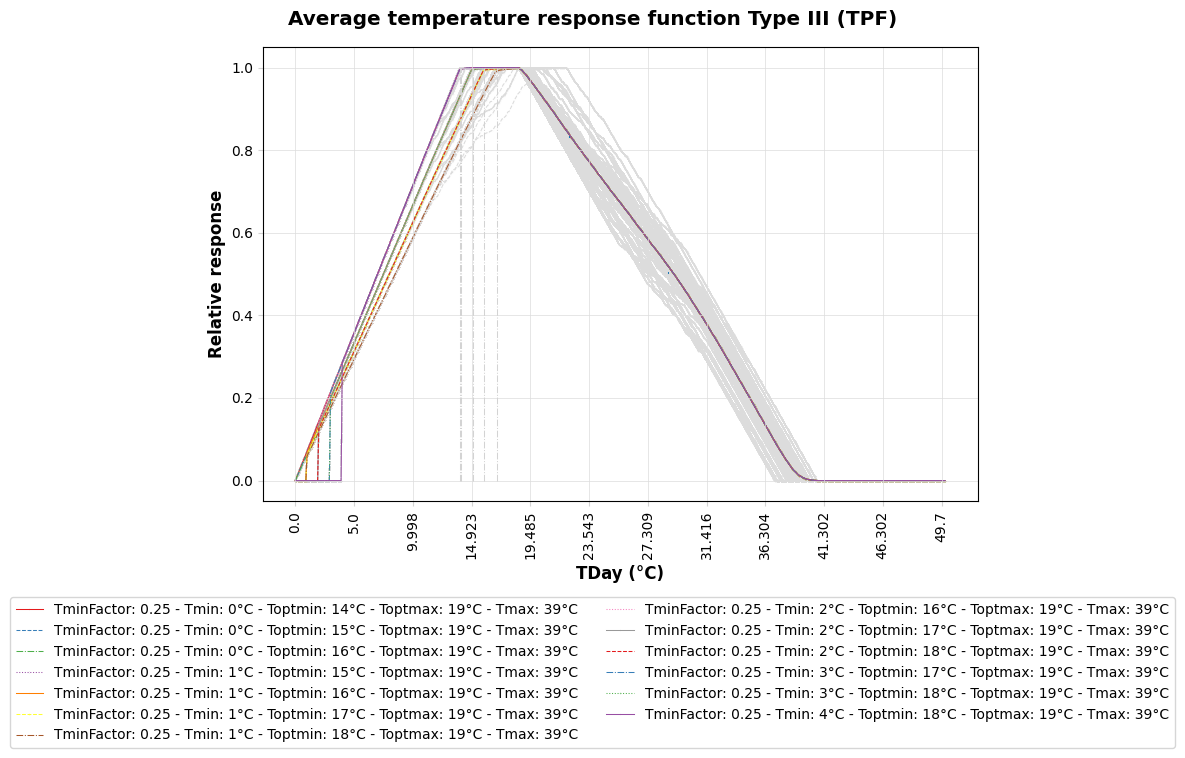

In [26]:
%%time
figures.diplay_Figure_Type_II_TPF_InOneFig(cmb=filtered_c_TPF, fnct='TPF', 
                                           df_tdays=df_TDays_vs_TempResponse, 
                                           df_tdays_mean=df_TDays_vs_TempResponse_mean_allSites,
                                           saveFig=True,showFig=True, fmt='jpg', leg_ncol=2,
                                           path_to_save_results=path_to_save_results)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 10/10 [00:52<00:00,  5.22s/it]


CPU times: user 1min 1s, sys: 898 ms, total: 1min 2s
Wall time: 1min 2s


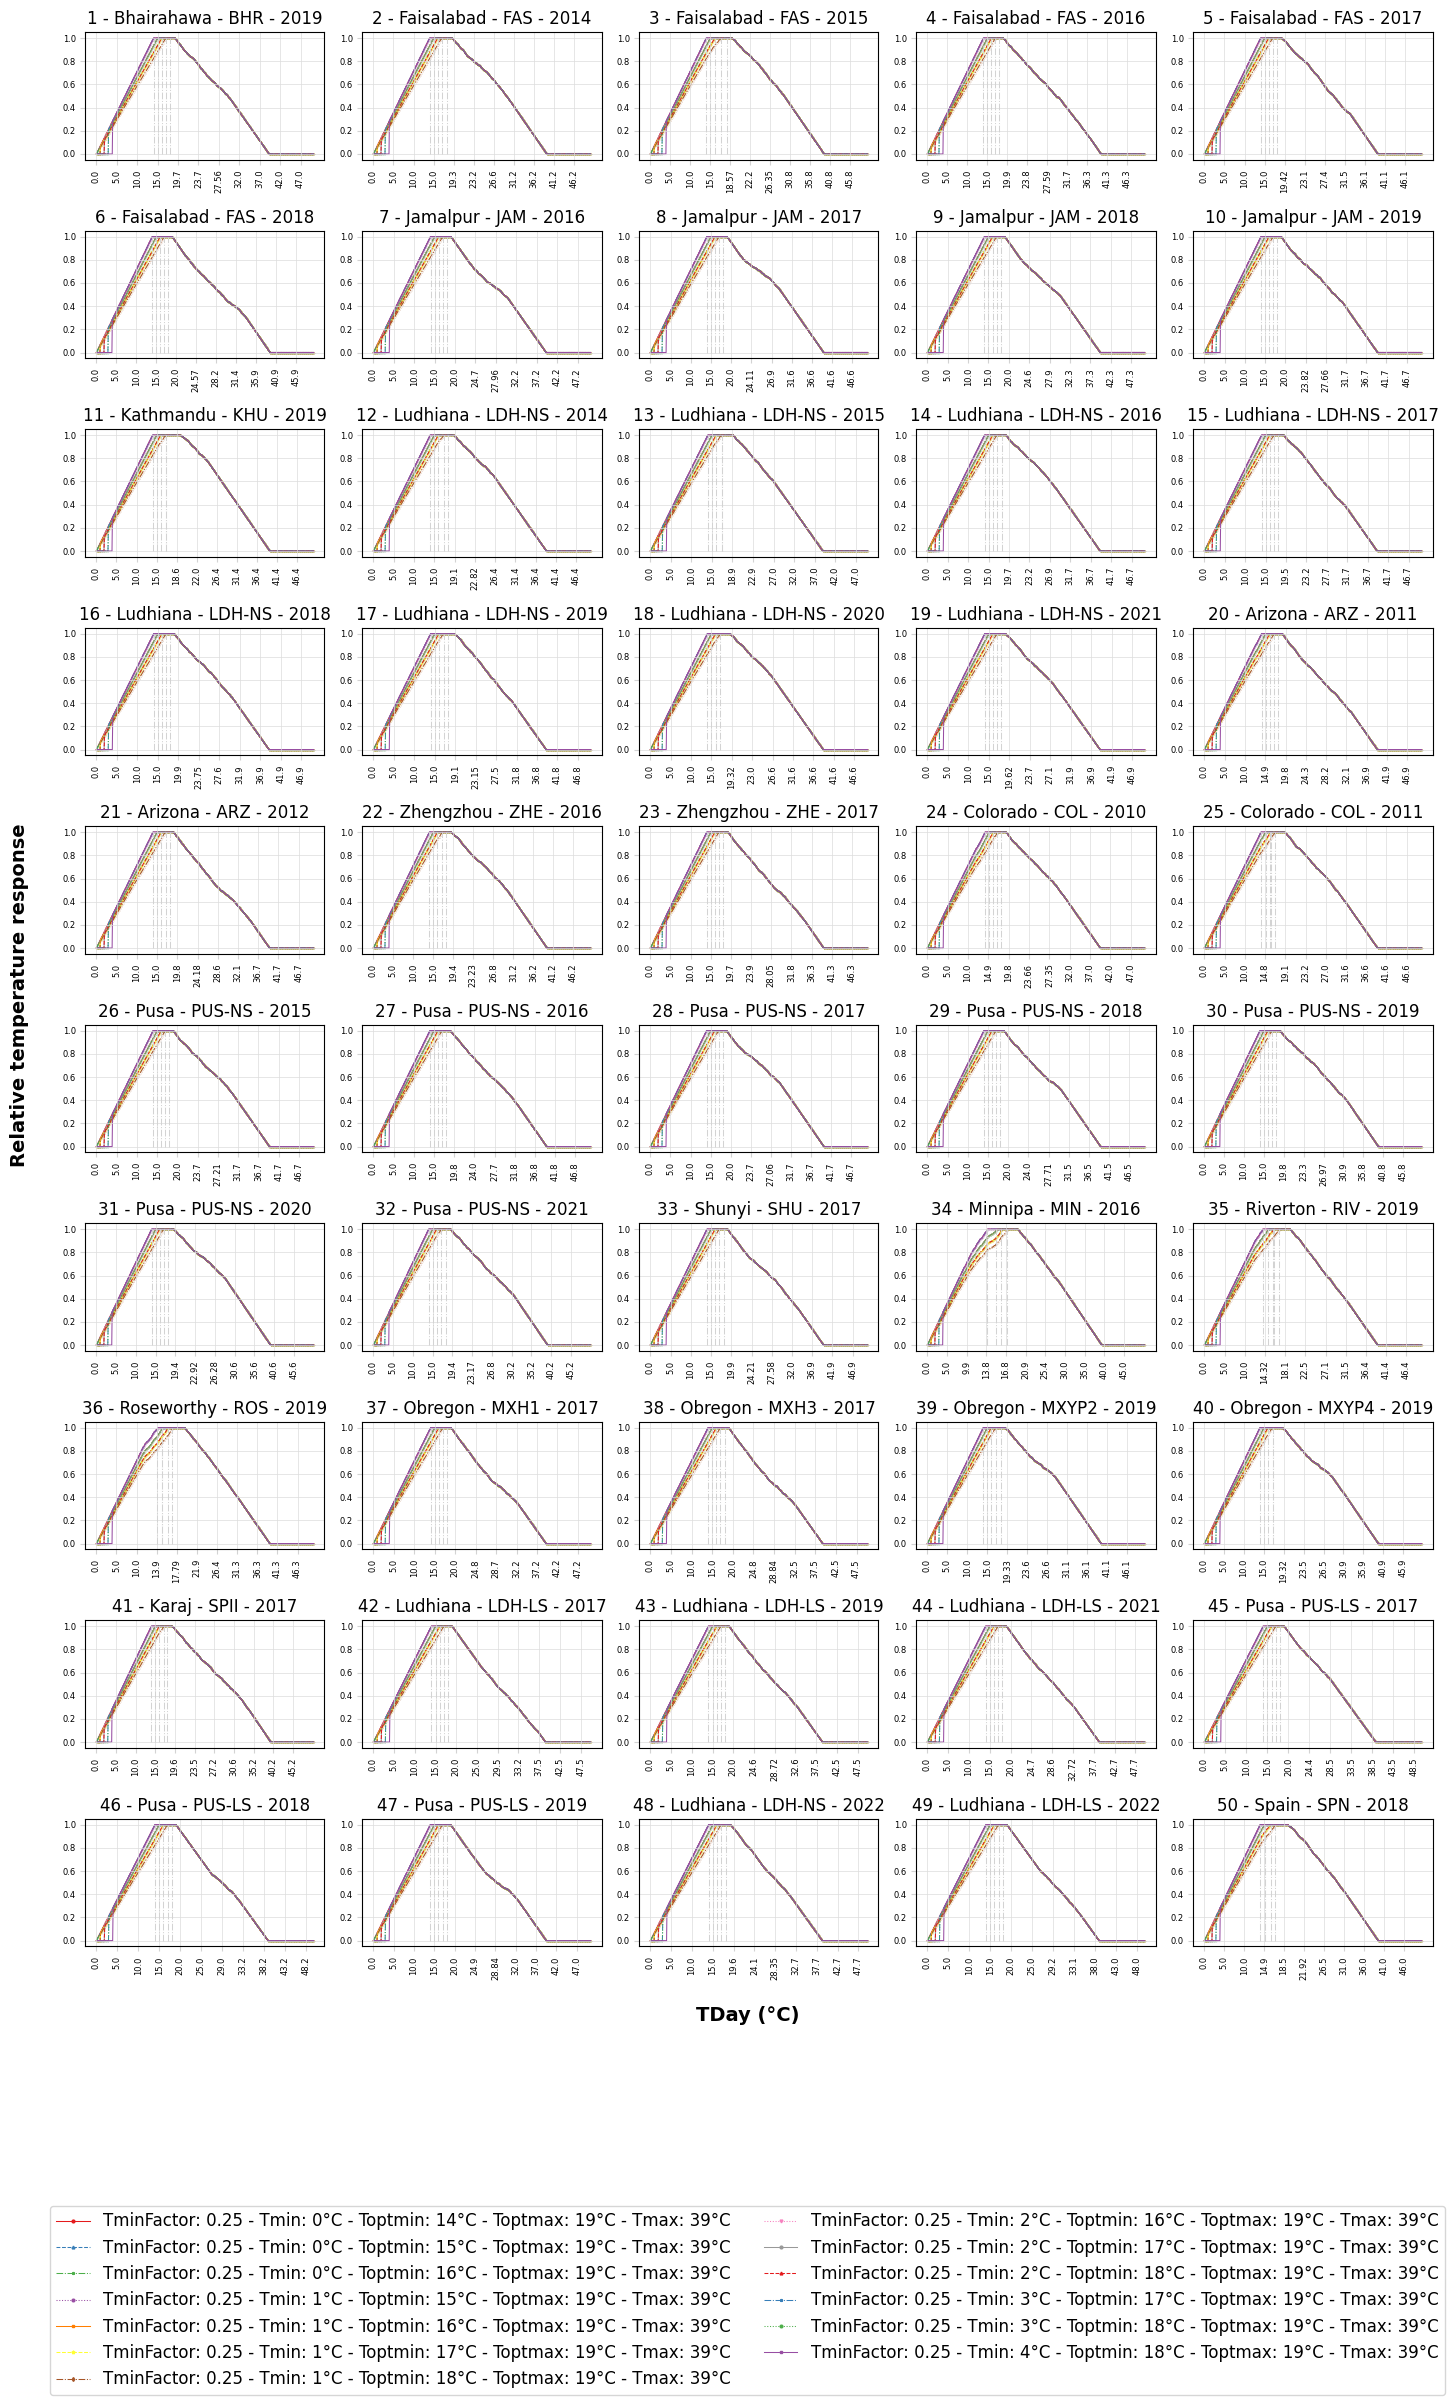

In [28]:
%%time
figures.display_FigTDay_vs_TempResponseBySiteYrs_TPF(cmb=filtered_c_TPF, df_tdays=df_TDays_vs_TempResponse, 
                                         roundVal=2, maxTDay=50, fnct='TPF', 
                                         saveFig=True, showFig=True, fmt='jpg', cols=5, leg_ncol=2,
                                         path_to_save_results=path_to_save_results)

100%|██████████████████████████████████████████████████████████████████████████████████████████████| 13/13 [00:00<00:00, 14.76it/s]


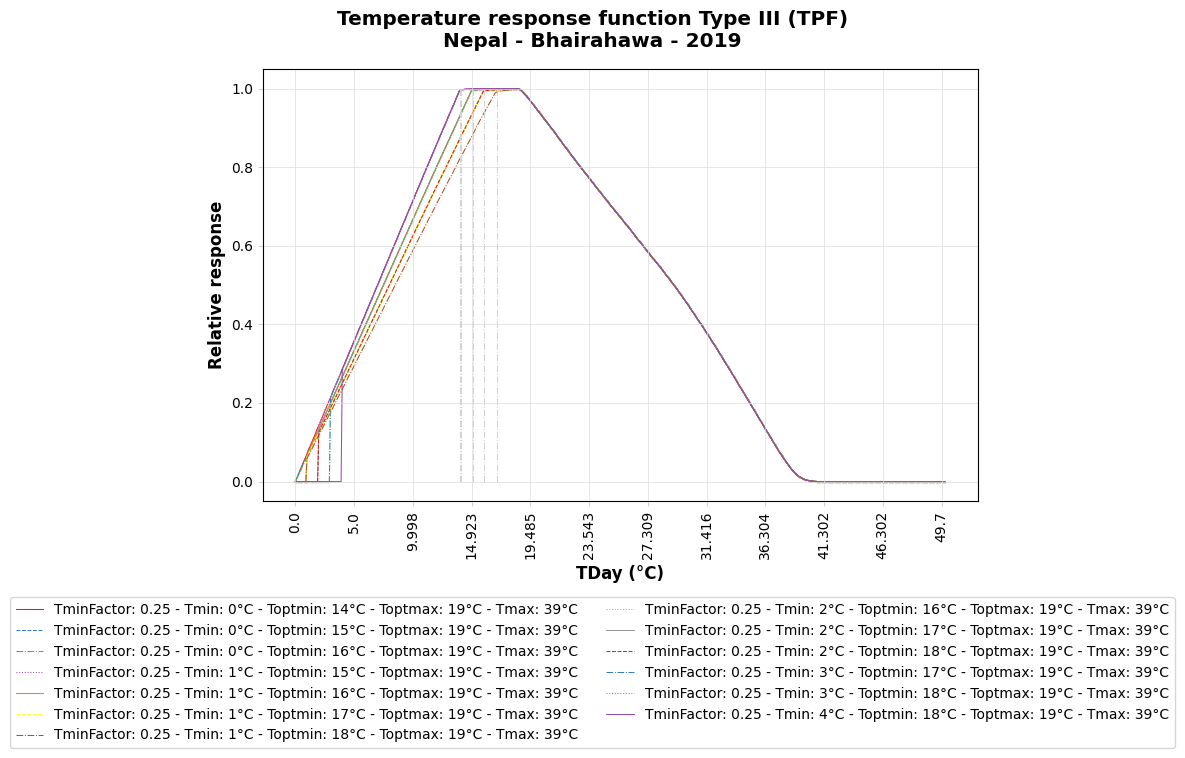

In [27]:
uid = 1
df0 = filtered_c_TPF[filtered_c_TPF['UID']==uid].reset_index(drop=True)
figures.diplay_Figure_Type_II_TPF_InOneFig(cmb=df0, fnct='TPF', 
                                           df_tdays=df_TDays_vs_TempResponse, 
                                           df_tdays_mean=df_TDays_vs_TempResponse_mean_allSites,
                                           saveFig=True,showFig=True, fmt='jpg', leg_ncol=2,
                                           path_to_save_results=path_to_save_results) #fname = "Figure_TPF_SiteYrs_Comparison" 

## Conclusion

Congratulations! You have run a simulation using a prebuilt dataset and the Temperature Functions API.


### Type 3- Four cardinal temperatures

|Model Parameters  | No stress  |  VPD stress |
|---|---|---| 
|RUE|3.0|3.0|
|TminFactor|0.25|0.25|
|Tmin|0-4 °C|2-4 °C|
|Toptmin|14-18 °C|14-18 °C|
|Toptmax|19 °C|19 °C|
|Tmax|39 °C|38-39 °C|
|SFvpdL||0.8|
|SFvpdU||1|
|VPDL ||3 kPa|
|VPDU ||3.5 kPa|


In [24]:
print(filtered_c_TPF['Tmin'].sort_values().unique())
print(filtered_c_TPF['Toptmin'].sort_values().unique())
print(filtered_c_TPF['Toptmax'].sort_values().unique())
print(filtered_c_TPF['Tmax'].sort_values().unique())
print(filtered_c_TPF_SFvpd['Tmin'].sort_values().unique())
print(filtered_c_TPF_SFvpd['Toptmin'].sort_values().unique())
print(filtered_c_TPF_SFvpd['Toptmax'].sort_values().unique())
print(filtered_c_TPF_SFvpd['Tmax'].sort_values().unique())
print(filtered_c_TPF_SFvpd['Lvpd'].sort_values().unique())
print(filtered_c_TPF_SFvpd['Uvpd'].sort_values().unique())
print(filtered_c_TPF_SFvpd['SFvpd_Lthres'].sort_values().unique())
print(filtered_c_TPF_SFvpd['SFvpd_Uthres'].sort_values().unique())

[0. 1. 2. 3. 4.]
[14. 15. 16. 17. 18.]
[19.]
[39.]
[2. 3. 4.]
[14. 15. 16. 17. 18.]
[19.]
[38. 39.]
[3.]
[3.5]
[0.8]
[1.]
